Assignment 8 <br>
    
Referral id: SIRSS1088 <br>
NAME: ONASVEE BANARSE <br>
EMAIL : 2obanarse@gmail.com <br>
COLLEGE: AISSMS IOIT <br>
GitHub : https://github.com/ORION-22/RegexSoftware_ASSIGNMENT.git

<h1>Linear Regression with Gradient Descent</h1>

## Gradient descent algorithm

\begin{equation}
\theta^{+} = \theta^{-} + \frac{\alpha}{m} (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This minimizes the following cost function

\begin{equation}
J(x, \theta, y) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2
\end{equation}

where
\begin{equation}
h(x_i) = \theta^T \bar{x}
\end{equation}

### Batch gradient descent
```FOR j FROM 0 -> max_iteration: 
    FOR i FROM 0 -> m: 
        theta += (alpha / m) * (y[i] - h(x[i])) * x_bar
    ENDLOOP
ENDLOOP
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Generate data"""
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


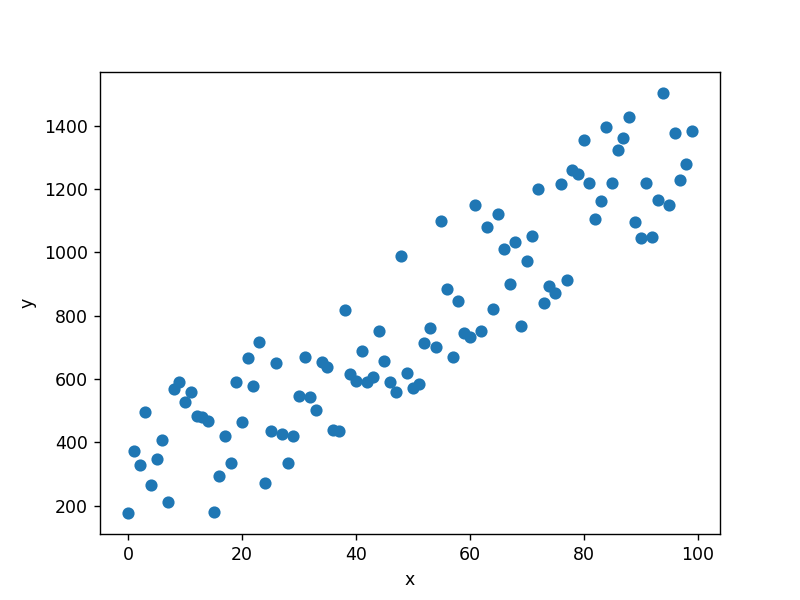

In [4]:
%matplotlib notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [14]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('\n')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store
    

In [15]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)



iteration: 0
cost: 7285077.137129135


iteration: 1
cost: 26172.17175506378


iteration: 2
cost: 18699.136047629923


iteration: 3
cost: 18664.83551568936


iteration: 4
cost: 18659.776341441087


iteration: 5
cost: 18655.426158603652


iteration: 6
cost: 18651.099479402073


iteration: 7
cost: 18646.77563383206


iteration: 8
cost: 18642.453992668205


iteration: 9
cost: 18638.13453571693


iteration: 10
cost: 18633.817261297987


iteration: 11
cost: 18629.50216829443


iteration: 12
cost: 18625.18925560697


iteration: 13
cost: 18620.87852213735


iteration: 14
cost: 18616.56996678794


iteration: 15
cost: 18612.263588461647


iteration: 16
cost: 18607.959386061888


iteration: 17
cost: 18603.65735849268


iteration: 18
cost: 18599.357504658572


iteration: 19
cost: 18595.059823464664


iteration: 20
cost: 18590.76431381661


iteration: 21
cost: 18586.470974620628


iteration: 22
cost: 18582.179804783438


iteration: 23
cost: 18577.890803212387


iteration: 24
cost: 18573.603968815



iteration: 250
cost: 17658.300398768206


iteration: 251
cost: 17654.478305108685


iteration: 252
cost: 17650.658143422133


iteration: 253
cost: 17646.839912735246


iteration: 254
cost: 17643.02361207519


iteration: 255
cost: 17639.20924046965


iteration: 256
cost: 17635.39679694677


iteration: 257
cost: 17631.586280535215


iteration: 258
cost: 17627.777690264113


iteration: 259
cost: 17623.971025163075


iteration: 260
cost: 17620.166284262243


iteration: 261
cost: 17616.363466592196


iteration: 262
cost: 17612.562571184037


iteration: 263
cost: 17608.763597069326


iteration: 264
cost: 17604.966543280145


iteration: 265
cost: 17601.17140884902


iteration: 266
cost: 17597.37819280901


iteration: 267
cost: 17593.586894193628


iteration: 268
cost: 17589.79751203689


iteration: 269
cost: 17586.01004537327


iteration: 270
cost: 17582.224493237773


iteration: 271
cost: 17578.44085466585


iteration: 272
cost: 17574.65912869345


iteration: 273
cost: 17570.879314357022



<IPython.core.display.Javascript object>


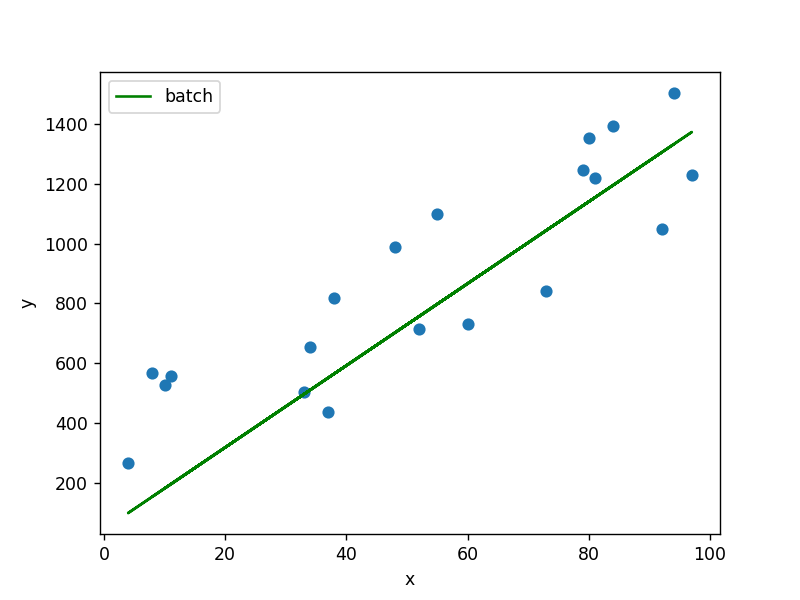

batch      T0, T1: 45.724476210337706, 13.677535202151057
batch rms:      223.62194768882088


In [12]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')